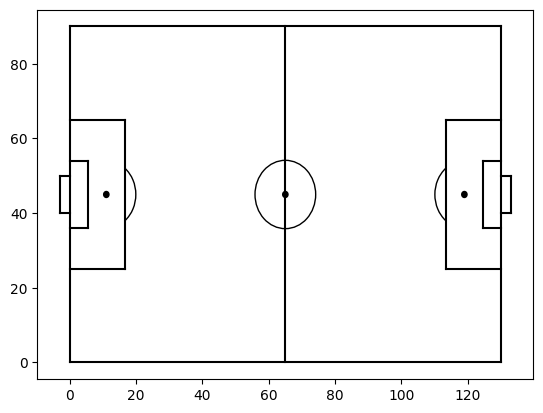

In [1]:
'''
football_pitch_map.py
--------------------

This Python module is all about creating a football pitchmap
using the visualization module 'Matplotlib'.

Modules Used(1):
---------------
1. matplotlib -- it is a plotting library for the Python programming language

Function Defined(6):
-------------------
1. create_boundries -- for creating boundary lines of the pitch.
2. create_center_circle -- for creating center circle.
3. left_penalty_area -- for creating left penalty area.(6-yard box has separate function)
4. right_penalty_area -- for creating right penalty area.(6-yard box has separate function)
5. left_sixyard_box -- for creating six-yard box for left penalty box.
6. right_sixyard_box -- for creating six-yard box for right penalty box.
'''

## importing modules
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

## creating our figure object for our pitchmap
pitch_map = plt.figure()

## adding subplot to the figure
pitch_axis = pitch_map.add_subplot(1,1,1)

def create_boundries():
    '''
    Function will create the boundary line
    and the middle line of the pitch with
    the goal-post at either end of the pitch.
    '''
    ## the following lines of code will create the boundaries
    ## and the middle line of the pitchmap
    plt.plot([0,0],[0,90], color='black')
    plt.plot([0,130],[0,0], color='black')
    plt.plot([130,130],[0,90], color='black')
    plt.plot([130,0],[90,90], color='black')
    plt.plot([65,65],[0,90], color='black')

    ## the following lines of code will create
    ## the goal-post at both side of the pitch
    plt.plot([-3,0], [40,40], color='black')
    plt.plot([-3,0], [50,50], color='black')
    plt.plot([-3,-3], [40,50], color='black')
    plt.plot([133,133], [40,50], color='black')
    plt.plot([130,133], [40,40], color='black')
    plt.plot([130,133], [50,50], color='black')

def create_center_circle():
    '''
    Function will create a circle at the
    center of the pitchmap, with highlighting
    the center of the circle.
    '''
    ## making a circle first by defined position
    centreCircle = plt.Circle((65,45), 9.15, color='black', fill=False)
    centreSpot = plt.Circle((65,45), 0.8, color='black')

    ## add the circle to the pitchmap
    pitch_axis.add_patch(centreCircle)
    pitch_axis.add_patch(centreSpot)

def left_penalty_area():
    '''
    Function will create the left penalty
    area of the pitchmap.
    '''
    ## left Penalty Area(without-arc)
    plt.plot([16.5,16.5],[65,25],color='black')
    plt.plot([0,16.5],[65,65],color='black')
    plt.plot([16.5,0],[25,25],color='black')

    ## making the left-arc
    left_arc = Arc((10.75,45), width=18.3, height=18.3, angle=0, theta1=310, theta2=50, color='black')

    ## adding the left arc
    pitch_axis.add_patch(left_arc)

def right_penalty_area():
    '''
    Function will create the right penalty
    area of the pitchmap.
    '''
    ## right Penalty Area(without-arc)
    plt.plot([113.5,130], [65,65], color='black')
    plt.plot([113.5,130], [25,25], color='black')
    plt.plot([113.5, 113.5], [25,65], color='black')

    ## making the right-arc
    right_arc = Arc((119.25,45), width=18.3, height=18.3, angle=180, theta1=310, theta2=50, color='black')

    ## adding the right arc
    pitch_axis.add_patch(right_arc)

def left_sixyard_box():
    '''
    Function will create the left
    six-yard box and the spot in the penalty box.
    '''
    ## the six-yard box
    plt.plot([0,5.5], [54,54], color='black')
    plt.plot([0,5.5], [36,36], color='black')
    plt.plot([5.5,5.5], [54,36], color='black')

    ## creating the penalty-box spot
    penalty_spot = plt.Circle((11,45), radius=0.8, color='black')

    ## adding the spot to the penalty box
    pitch_axis.add_patch(penalty_spot)

def right_sixyard_box():
    '''
    Function will create the right
    six-yard box and the spot in the penalty box.
    '''
    ## the six-yard box
    plt.plot([130,124.5], [54,54], color='black')
    plt.plot([130,124.5], [36,36], color='black')
    plt.plot([124.5,124.5], [54,36], color='black')

    ## creating the penalty-box spot
    penalty_spot = plt.Circle((119,45), radius=0.8, color='black')

    ## adding the spot to the penalty box
    pitch_axis.add_patch(penalty_spot)


## calling all the functions to create the pitch map.

create_boundries()
## to create the boundary lines

create_center_circle()
## to create the center circle

left_penalty_area()
## to create the left-penalty box

right_penalty_area()
## to create the right-penalty box

left_sixyard_box()
## to create the left-penalty six-yard box

right_sixyard_box()
## to create the right-penalty six-yard box

plt.show()
## to display the plot on the screen

## Slothfulwave612...

In [2]:
# -*- coding: utf-8 -*-
"""
load_data.py
-----------
Created on Wed Apr 15 21:54:09 2020

@author: slothfulwave612

This Python module will help to load the
Statsbomb's competition and match data.

Here we will take the football match between
Real Madrid and Barcelona from La Liga 2008-09
played at Santiago Bernabeu, the result ended at 2-6.

And then we will display all the result of Barcelona for
La Liga Season 2008-09 season from the data present in the dataset.

Modules Used(1):
---------------
1. json -- module to work with JSON data.
"""
import json        ## importing json module

## loading the competitions.json file
with open('../Statsbomb/data/competitions.json') as comp_file:
    comp_data = json.load(comp_file)

## if you will see the comp_data you will find
## that the La Liga 2008-09 competition has id number 11
## and the season id is 41
comp = 11
season_id = 41

## load all the matches from this competition
with open('../Statsbomb/data/matches/' + str(comp) + '/' + str(season_id) + '.json') as match_file:
    match_data = json.load(match_file)

## now finding home team and away team
## home team: Real Madrid
## away team: Barcelona
## match id: None(set by default)
home_team = 'Real Madrid'
away_team = 'Barcelona'
match_id = None
score = None

## iterating through each match to find the match_id
for match in match_data:
    home_team_value = (match['home_team']['home_team_name'] == home_team)
    away_team_value = (match['away_team']['away_team_name'] == away_team)

    if home_team_value and away_team_value:
        match_id = match['match_id']
        score = str(match['home_score']) + ' : ' + str(match['away_score'])

## checking if the match is found or not
## if found then displaying the right result
if match_id != None:
    print('{} vs {} has match id: {}'.format(home_team, away_team, match_id))
    print('Score: {}'.format(score))
else:
    print('No match found')

## let's try to find all the results for Barcelona for
## La Liga season 2008-09
for match in match_data:
    home_team_value = match['home_team']['home_team_name']
    away_team_value = match['away_team']['away_team_name']

    if home_team_value == 'Barcelona' or away_team_value == 'Barcelona':
        score = str(match['home_score']) + ' : ' + str(match['away_score'])
        print('{} vs {}, score: {}'.format(home_team_value, away_team_value, score))

FileNotFoundError: [Errno 2] No such file or directory: '../Statsbomb/data/competitions.json'

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 25 17:32:00 2020

@author: davsu428
"""
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def createPitch(length,width, unity,linecolor): # in meters
    # Code by @JPJ_dejong

    """
    creates a plot in which the 'length' is the length of the pitch (goal to goal).
    And 'width' is the width of the pitch (sideline to sideline).
    Fill in the unity in meters or in yards.

    """
    #Set unity
    if unity == "meters":
        # Set boundaries
        if length >= 120.5 or width >= 75.5:
            return(str("Field dimensions are too big for meters as unity, didn't you mean yards as unity?\
                       Otherwise the maximum length is 120 meters and the maximum width is 75 meters. Please try again"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)

            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)

            #Left Penalty Area
            plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)

            #Right Penalty Area
            plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)

            #Left 5-meters Box
            plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
            plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)

            #Right 5 -eters Box
            plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
            plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)

            #Prepare Circles
            centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)

            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)

            #Prepare Arcs
            leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
            rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)

            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
            #Axis titles

    #check unity again
    elif unity == "yards":
        #check boundaries again
        if length <= 95:
            return(str("Didn't you mean meters as unity?"))
        elif length >= 131 or width >= 101:
            return(str("Field dimensions are too big. Maximum length is 130, maximum width is 100"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)

            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)

            ## the following lines of code will create
            ## the goal-post at both side of the pitch
            plt.plot([-3,0], [(width/2)-5,(width/2)-5], color=linecolor)
            plt.plot([-3,0], [(width/2)+5,(width/2)+5], color=linecolor)
            plt.plot([-3,-3], [(width/2)-5,(width/2)+5], color=linecolor)
            plt.plot([length+3,length+3], [(width/2)-5,(width/2)+5], color=linecolor)
            plt.plot([length,length+3], [(width/2)-5,(width/2)-5], color=linecolor)
            plt.plot([length,length+3], [(width/2)+5,(width/2)+5], color=linecolor)

            #Left Penalty Area
            plt.plot([18 ,18],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([0,18],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([18,0],[(width/2 -18),(width/2 -18)],color=linecolor)

            #Right Penalty Area
            plt.plot([(length-18),length],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([(length-18), (length-18)],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([(length-18),length],[(width/2 -18),(width/2 -18)],color=linecolor)

            #Left 6-yard Box
            plt.plot([0,6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([6,6],[(width/2+7.32/2+6),(width/2-7.32/2-6)],color=linecolor)
            plt.plot([6,0],[(width/2-7.32/2-6),(width/2-7.32/2-6)],color=linecolor)

            #Right 6-yard Box
            plt.plot([length,length-6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([length-6,length-6],[(width/2+7.32/2+6),width/2-7.32/2-6],color=linecolor)
            plt.plot([length-6,length],[(width/2-7.32/2-6),width/2-7.32/2-6],color=linecolor)

            #Prepare Circles; 10 yards distance. penalty on 12 yards
            centreCircle = plt.Circle((length/2,width/2),10,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((12,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-12,width/2),0.8,color=linecolor)

            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)

            #Prepare Arcs
            leftArc = Arc((11,width/2),height=20,width=20,angle=0,theta1=312,theta2=48,color=linecolor)
            rightArc = Arc((length-11,width/2),height=20,width=20,angle=0,theta1=130,theta2=230,color=linecolor)

            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)

    #Tidy Axes
    plt.axis('off')

    return fig,ax

In [6]:
from pandas import json_normalize

In [9]:
!pip install FCPython

ERROR: Could not find a version that satisfies the requirement FCPython (from versions: none)
ERROR: No matching distribution found for FCPython


FileNotFoundError: [Errno 2] No such file or directory: '../Statsbomb/data/events/69249.json'

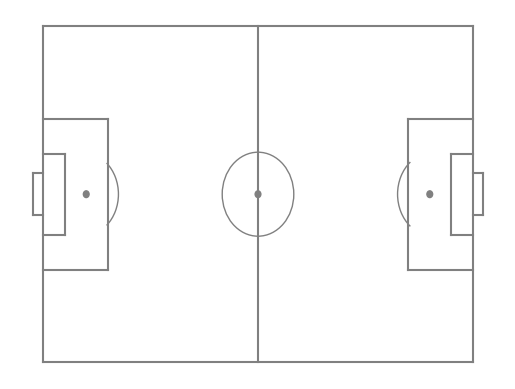

In [10]:
import matplotlib.pyplot as plt
import json
from pandas import json_normalize

## Note Statsbomb data uses yards for their pitch dimensions
pitch_length_X = 120
pitch_width_Y = 80

## calling the function to create a pitch map
## yards is the unit for measurement and
## gray will be the line color of the pitch map
(fig,ax) = createPitch(pitch_length_X, pitch_width_Y,'yards','gray')

## match id for our El Clasico
match_id = 69249
home_team = 'Real Madrid'
away_team = 'Barcelona'
player_name = 'Lionel Andrés Messi Cuccittini'

## this is the name of our event data file for
## our required El Clasico
file_name = str(match_id) + '.json'

## loading the required event data file
##with open('../Statsbomb/data/events/' + file_name) as event_data:
    ##my_data = json.load(event_data, encoding='utf-8')
my_data = json.load(open('../Statsbomb/data/events/' + file_name, 'r', encoding='utf-8'))
## get the nested structure into a dataframe
## store the dataframe in a dictionary with the match id as key
df = json_normalize(my_data, sep='_').assign(match_id = file_name[:-5])

## making the list of all column names
column = list(df.columns)

## all the type names we have in our dataframe
all_type_name = list(df['type_name'].unique())

## creating dataframe for dribbles
dribble_df = df.loc[df['type_name'] == 'Dribble'].set_index('index')
dribble_df.dropna(inplace=True, axis=1)
dribble_df = dribble_df.loc[dribble_df['player_name'] == player_name, :]

## iterating through the dribble dataframe we created
for row_num, dribble in dribble_df.iterrows():
    x_loc = dribble['location'][0]
    y_loc = dribble['location'][1]

    if dribble['player_name'] == player_name:
        touch_circle = plt.Circle((pitch_length_X - x_loc, y_loc), radius=1.5, color='blue')

        if dribble['dribble_outcome_name'] == 'Incomplete':
            ## if incomplete dribble then fade out the circle
            touch_circle.set_alpha(0.3)

        ax.add_patch(touch_circle)

## placing text on the plot
plt.text(10, 82, '{}\'s Dribbls vs Real Madrid'.format(player_name), fontsize=12)
plt.text(80, 85, 'Darker Circles: Successful Dribbles', fontsize=12)
plt.text(80, 82, 'Faded Circles: Unsuccessful Dribbles', fontsize=12)

## setting figure and saving it
fig.set_size_inches(12, 8)
fig.savefig('{}\'s Dribbles vs Real Madrid'.format(player_name))

## displaying the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../Statsbomb/data/events/69249.json'

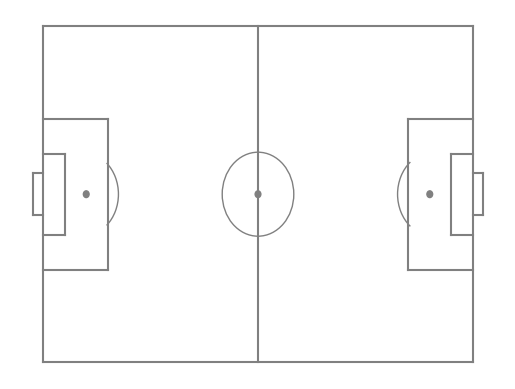

In [11]:
## Note Statsbomb data uses yards for their pitch dimensions
pitch_length_X = 120
pitch_width_Y = 80

## calling the function to create a pitch map
## yards is the unit for measurement and
## gray will be the line color of the pitch map
(fig,ax) = createPitch(pitch_length_X, pitch_width_Y,'yards','gray')

## match id for our El Clasico
match_id = 69249
home_team = 'Real Madrid'
away_team = 'Barcelona'
player_name = 'Xavier Hernández Creus'

## this is the name of our event data file for
## our required El Clasico
file_name = str(match_id) + '.json'

## loading the required event data file
my_data = json.load(open('../Statsbomb/data/events/' + file_name, 'r', encoding='utf-8'))

## get the nested structure into a dataframe
## store the dataframe in a dictionary with the match id as key
df = json_normalize(my_data, sep='_').assign(match_id = file_name[:-5])

## making the list of all column names
column = list(df.columns)

## all the type names we have in our dataframe
all_type_name = list(df['type_name'].unique())

## creating a data frame for pass
## and then removing the null values
## only listing the player_name in the dataframe
pass_df = df.loc[df['type_name'] == 'Pass', :].copy()
pass_df.dropna(inplace=True, axis=1)
pass_df = pass_df.loc[pass_df['player_name'] == player_name, :]

## creating a data frame for ball receipt
## removing all the null values
## and only listing Barcelona players in the dataframe
breceipt_df = df.loc[df['type_name'] == 'Ball Receipt*', :].copy()
breceipt_df.dropna(inplace=True, axis=1)
breceipt_df = breceipt_df.loc[breceipt_df['team_name'] == 'Barcelona', :]

pass_comp, pass_no = 0, 0
## pass_comp: completed pass
## pass_no: unsuccessful pass

## iterating through the pass dataframe
for row_num, passed in pass_df.iterrows():

    if passed['player_name'] == player_name:
        ## for away side
        x_loc = passed['location'][0]
        y_loc = passed['location'][1]

        pass_id = passed['id']
        summed_result = sum(breceipt_df.iloc[:, 14].apply(lambda x: pass_id in x))

        if summed_result > 0:
            ## if pass made was successful
            color = 'blue'
            label = 'Successful'
            pass_comp += 1
        else:
            ## if pass made was unsuccessful
            color = 'red'
            label = 'Unsuccessful'
            pass_no += 1

        ## plotting circle at the player's position
        shot_circle = plt.Circle((pitch_length_X - x_loc, y_loc), radius=2, color=color, label=label)
        shot_circle.set_alpha(alpha=0.2)
        ax.add_patch(shot_circle)

        ## parameters for making the arrow
        pass_x = 120 - passed['pass_end_location'][0]
        pass_y = passed['pass_end_location'][1]
        dx = ((pitch_length_X - x_loc) - pass_x)
        dy = y_loc - pass_y

        ## making an arrow to display the pass
        pass_arrow = plt.Arrow(pitch_length_X - x_loc, y_loc, -dx, -dy, width=1, color=color)

        ## adding arrow to the plot
        ax.add_patch(pass_arrow)

## computing pass accuracy
pass_acc = (pass_comp / (pass_comp + pass_no)) * 100
pass_acc = str(round(pass_acc, 2))

## adding text to the plot
plt.text(20, 85, '{} pass map vs Real Madrid'.format(player_name), fontsize=15)
plt.text(20, 82, 'Pass Accuracy: {}'.format(pass_acc), fontsize=15)

## handling labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best', bbox_to_anchor=(0.9, 1, 0, 0), fontsize=12)

## editing the figure size and saving it
fig.set_size_inches(12, 8)
fig.savefig('{} pass map.jpg'.format(player_name), dpi=200)

## showing the plot
plt.show()